In [61]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from wishpy.dataworker import DataWorker
dw = DataWorker(google_secret='../../../wishpy/client_secret.json')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/wishpy/dataworker.py:83: UserWarning: [Errno 2] No such file or directory: '../../../wishpy/client_secret.json'
  warnings.warn(str(e))


In [7]:
%matplotlib inline

In [24]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [25]:
plt.style.use('ggplot')

In [19]:
bb = data.DataReader(name = "BBR",data_source = "yahoo", start = "2010-07-01", end= "2010-12-31")
bb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-01,1440.0,1440.0,1440.0,1440.0,0.0,1440.0
2010-07-02,1440.0,1440.0,1440.0,1440.0,0.0,1440.0
2010-07-06,1440.0,1440.0,1440.0,1440.0,0.0,1440.0
2010-07-07,1440.0,1440.0,1440.0,1440.0,0.0,1440.0
2010-07-08,1440.0,1440.0,1440.0,1440.0,0.0,1440.0


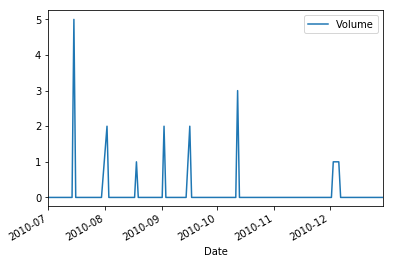

In [20]:
bb.plot(y='Volume')

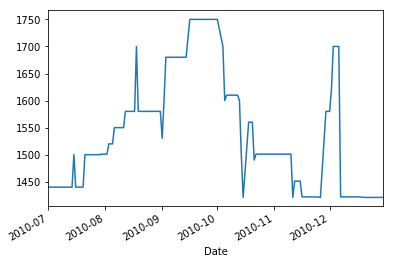

In [21]:
bb.High.plot()

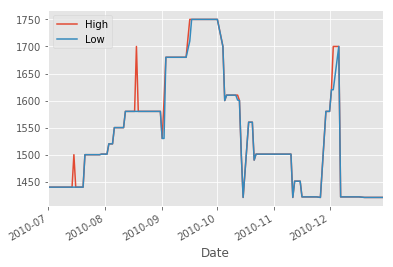

In [26]:
bb[['High','Low']].plot()

In [38]:
g = data.DataReader(name='GOOG',data_source='yahoo',start = "2008-07-01", end= "2008-12-31")
g.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-07-01,267.357880,257.534698,258.819885,266.366608,9956900,266.366608
2008-07-02,269.181030,262.047791,267.253265,262.535950,8477600,262.535950
2008-07-03,268.608185,262.765106,264.448792,267.497345,4818900,267.497345
2008-07-07,273.474945,266.799957,270.137451,270.939453,8542200,270.939453
2008-07-08,276.558380,268.991760,271.975555,276.229614,9901700,276.229614


In [45]:
def performance(stock):
    if stock <= 200:
        return 'Poor'
    elif stock > 200 and stock <= 250:
        return 'Good'
    else:
        return 'Stellar'

g['Close'].apply(performance).value_counts()

Poor       65
Good       48
Stellar    15
Name: Close, dtype: int64

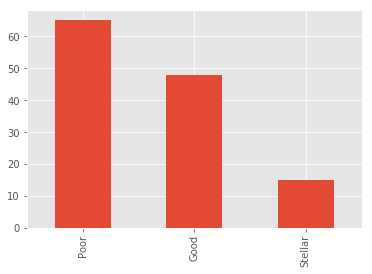

In [47]:
g['Close'].apply(performance).value_counts().plot(kind='bar')

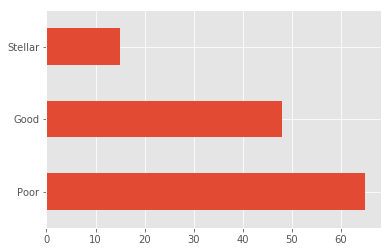

In [48]:
g['Close'].apply(performance).value_counts().plot(kind='barh')

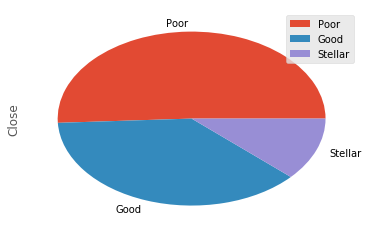

In [50]:
g['Close'].apply(performance).value_counts().plot(kind='pie', legend=True)

In [53]:
def custom_round(stock):
    return int(stock/10.0)*10

In [55]:
g['Close'].apply(custom_round).value_counts().sort_index()

120     2
130     6
140    12
150    15
160     9
170     9
180     9
190     3
200     5
210     9
220     4
230    16
240    14
250     5
260     8
270     2
Name: Close, dtype: int64

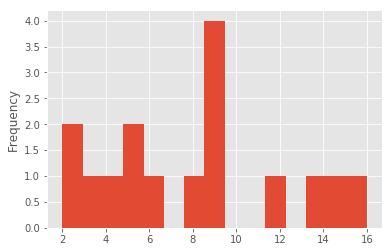

In [60]:
g['Close'].apply(custom_round).value_counts().plot(kind='hist',bins=15)

You can look at job id 669247979


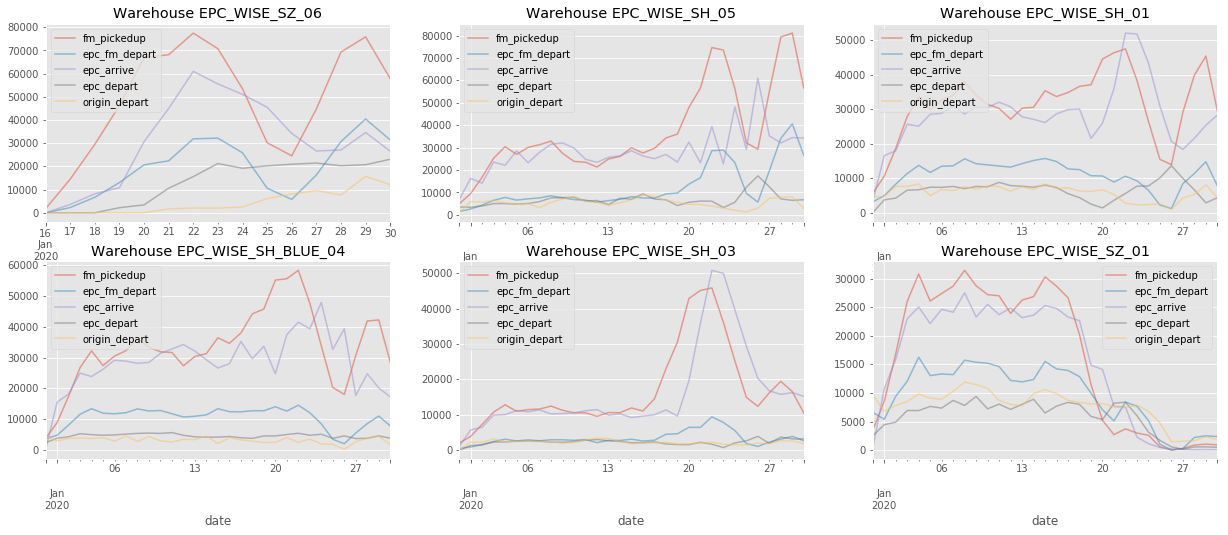

In [62]:
t = dw.td_query(job_id=669247979)
t.loc[:, 'date'] = pd.to_datetime(t.date)

fig, axes = plt.subplots(2,3, figsize=(21, 8))
c = list(t.loc[(t.date == '2020-01-29') & (t.warehouse>=1000) & (t.warehouse < 2000) & (t.whn.str.contains('WISE')),:].sort_values('fm_pickedup', ascending=False).head(16).whn)
for i in range(6):
    wh = c[i]
    m = int(i / 3)
    n = int(i % 3)
    t.loc[t.whn==wh,['date', 'fm_pickedup', 'epc_fm_depart', 'epc_arrive', 'epc_depart', 'origin_depart']].set_index('date').sort_index().fillna(0).rolling(3, min_periods=0).mean().plot(ax=axes[m][n], title='Warehouse {}'.format(wh), alpha=.5)

In [75]:
t.loc[t.whn=='EPC_WISE_SZ_06',['date', 'fm_pickedup']].set_index('date').sort_index().fillna(0).rolling(3, min_periods=0).mean() , t.loc[t.whn=='EPC_WISE_SZ_06',['date', 'fm_pickedup']].set_index('date').sort_index()

(             fm_pickedup
 date                    
 2020-01-16   1763.000000
 2020-01-17  14491.000000
 2020-01-18  29507.333333
 2020-01-19  46214.000000
 2020-01-20  66953.000000
 2020-01-21  68153.333333
 2020-01-22  77468.666667
 2020-01-23  70750.000000
 2020-01-24  53458.333333
 2020-01-25  30216.666667
 2020-01-26  24566.666667
 2020-01-27  44779.333333
 2020-01-28  69293.333333
 2020-01-29  75849.666667
 2020-01-30  57852.333333,             fm_pickedup
 date                   
 2020-01-16       1763.0
 2020-01-17      27219.0
 2020-01-18      59540.0
 2020-01-19      51883.0
 2020-01-20      89436.0
 2020-01-21      63141.0
 2020-01-22      79829.0
 2020-01-23      69280.0
 2020-01-24      11266.0
 2020-01-25      10104.0
 2020-01-26      52330.0
 2020-01-27      71904.0
 2020-01-28      83646.0
 2020-01-29      71999.0
 2020-01-30      17912.0)

,fm_pickedup
date,
2020-01-16,1763.0
2020-01-17,27219.0
2020-01-18,59540.0
2020-01-19,51883.0
2020-01-20,89436.0
2020-01-21,63141.0
2020-01-22,79829.0
2020-01-23,69280.0
2020-01-24,11266.0
